# MOVIE RATING SYSTEM

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importing Dataset

df = pd.read_csv('C:\\Twitter Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Size of Dataset

df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Removing duplicate reviews

duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)
df = df.drop_duplicates('review')
df.shape

Number of duplicate entries:  418


(49582, 2)

In [6]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [7]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


## Analysing Dataset

Text(0.5, 1.0, 'Sentiment distribution')

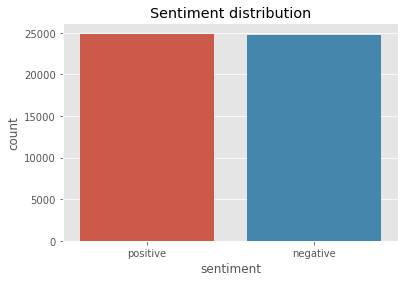

In [8]:
sns.countplot(x = 'sentiment', data = df)
plt.title("Sentiment distribution")

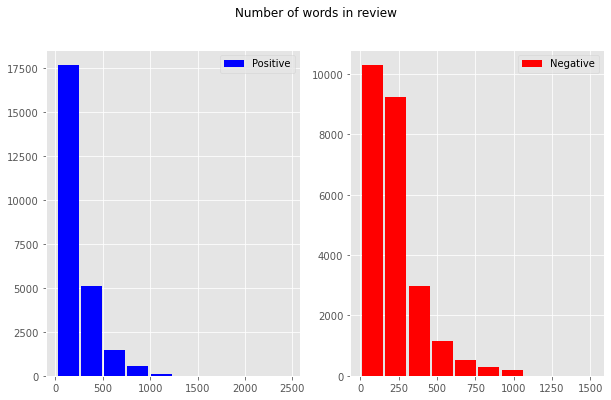

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label = 'Positive', color = 'blue', rwidth = 0.9);
ax[0].legend(loc = 'upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label = 'Negative', color = 'red', rwidth = 0.9);
ax[1].legend(loc = 'upper right');
fig.suptitle("Number of words in review")
plt.show()

In [10]:
df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


## Data Preprocessing
    1. Converting all the words to lowercase
    2. Removing special characters & html tags
    3. Tokenization
    4. Removing stop words
    5. Stemming
    6. Rejoining our list of words into string
   

In [11]:
def data_preprocessing(text):
    stemmer = PorterStemmer()
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    text = [stemmer.stem(word) for word in filtered_text]
    return " ".join(text)

In [12]:
df.review = df['review'].apply(data_preprocessing)
df.head()

,review,sentiment,word count
0,one review mention watch 1 oz episod youll hoo...,1,307
1,wonder littl product film techniqu unassum old...,1,162
2,thought wonder way spend time hot summer weeke...,1,166
3,basic there famili littl boy jake think there ...,0,138
4,petter mattei love time money visual stun film...,1,230


In [13]:
X = df['review']
Y = df['sentiment']

In [14]:
# Vectorization of Dataset

cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df['review']).toarray()
feature_vector = cv.get_feature_names()
feature_vector_str = ''
feature_vector_str = ' '.join(feature_vector)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [16]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34707, 1000)
Size of y_train:  (34707,)
Size of x_test:  (14875, 1000)
Size of y_test:  (14875,)


In [17]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()
clf4 = KNeighborsClassifier(n_neighbors = 5)

In [18]:
print(clf1.fit(x_train,y_train))
print(clf2.fit(x_train,y_train))
print(clf3.fit(x_train,y_train))
print(clf4.fit(x_train,y_train))

GaussianNB()
MultinomialNB()
BernoulliNB()
KNeighborsClassifier()


In [19]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)
y_pred4 = clf4.predict(x_test)

In [20]:
# Accuracy of Machine Learning Models

print("Gaussian",accuracy_score(y_test,y_pred1)*100,"%")
print("Multinomial",accuracy_score(y_test,y_pred2)*100,"%")
print("Bernaulli",accuracy_score(y_test,y_pred3)*100,"%")
print("K-Nearest Neighbour",accuracy_score(y_test,y_pred4)*100,"%")

Gaussian 78.9983193277311 %
Multinomial 82.62857142857143 %
Bernaulli 82.43361344537816 %
K-Nearest Neighbour 64.47731092436975 %


In [21]:
# Confusion Matrix

cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)
cm4 = confusion_matrix(y_test,y_pred4)
print("Gaussian Confusion Matrix\n",cm1,"\n")
print("Multinomial Confusion Matrix\n",cm2,"\n")
print("Bernaulli Confusion Matrix\n",cm3,"\n")
print("K-Nearest Neighbour Confusion Matrix\n",cm4)

Gaussian Confusion Matrix
 [[6156 1248]
 [1876 5595]] 

Multinomial Confusion Matrix
 [[6094 1310]
 [1274 6197]] 

Bernaulli Confusion Matrix
 [[5932 1472]
 [1141 6330]] 

K-Nearest Neighbour Confusion Matrix
 [[4282 3122]
 [2162 5309]]


Text(0.5, 1.0, 'K-Nearest Neighbour')

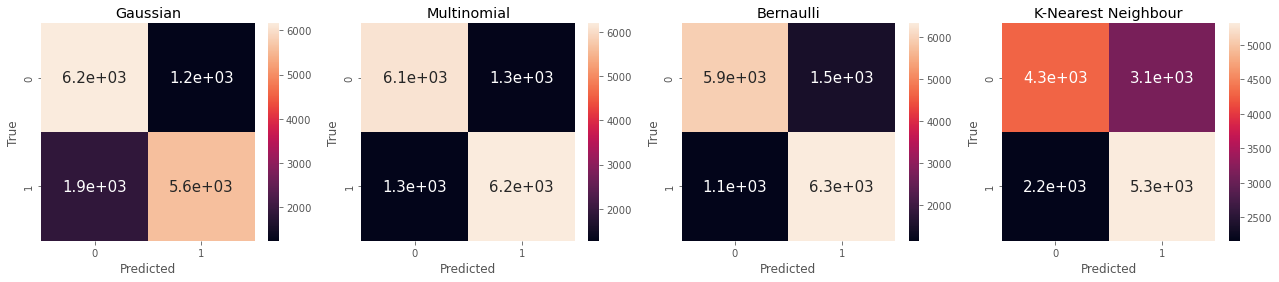

In [22]:
# Heat Map

plt.figure(figsize = (22,4))
plt.subplot(1,4,1)
sns.heatmap(cm1, annot = True, annot_kws = {'size': 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian')
plt.subplot(1,4,2)
sns.heatmap(cm2, annot = True, annot_kws = {'size': 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multinomial')
plt.subplot(1,4,3)
sns.heatmap(cm3, annot = True, annot_kws = {'size': 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bernaulli')
plt.subplot(1,4,4)
sns.heatmap(cm4, annot = True, annot_kws = {'size': 15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Nearest Neighbour')

In [23]:
new_tweet = '<> This movie was great! After watching this movie, I think people will start loving MS Dhoni. </>'
new_tweet = data_preprocessing(new_tweet)
trans = cv.fit_transform([new_tweet,feature_vector_str]).toarray()

In [24]:
translate = {
    1: 'Tweet is Positive',
    0: 'Tweet is Negative'
}
t1 = time.time()
time.sleep(1)
print(f"Gaussian: {translate[clf1.predict([trans[0]])[0]]}")
t2 = time.time()
print("Gaussian runtime:",t2-t1,"seconds\n")
t3 = time.time()
time.sleep(1)
print(f"Multinomial: {translate[clf2.predict([trans[0]])[0]]}")
t4 = time.time()
print("Multinomial runtime:",t4-t3,"seconds\n")
t5 = time.time()
time.sleep(1)
print(f"Bernaulli: {translate[clf3.predict([trans[0]])[0]]}")
t6 = time.time()
print("Bernaulli runtime:",t6-t5,"seconds\n")
t7 = time.time()
time.sleep(1)
print(f"K-Nearest Neighbour: {translate[clf4.predict([trans[0]])[0]]}")
t8 = time.time()
print("K-Nearest Neighbour runtime:",t8-t7,"seconds")

Gaussian: Tweet is Negative
Gaussian runtime: 1.0099406242370605 seconds

Multinomial: Tweet is Positive
Multinomial runtime: 1.0105221271514893 seconds

Bernaulli: Tweet is Positive
Bernaulli runtime: 1.0125336647033691 seconds

K-Nearest Neighbour: Tweet is Negative
K-Nearest Neighbour runtime: 1.200998306274414 seconds


## Conclusion:
We can observed that both the multinomial naive bayes model and bernaulli naive bayes model have more accuracy than gaussian naive bayes model and K-Nearest Neighbour model and also both the multinomial naive bayes model and bernaulli naive bayes model performing well than gaussian naive bayes model and K-Nearest Neighbour model. We can also observed that multinomial naive bayes model, bernaulli naive bayes model and gaussian naive bayes model tends to be faster when applied to data than K-Nearest Neighbour model.